# 10.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

faces = datasets.fetch_olivetti_faces()
X = faces['data']
y = faces['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.25,
                                                  stratify=y_train)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


silhouette_scores = []
inertias = []
k_arr = []

for k in range(95, 115, 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train, y_train)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_, random_state=42))
    k_arr.append(k)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 0, 'k')

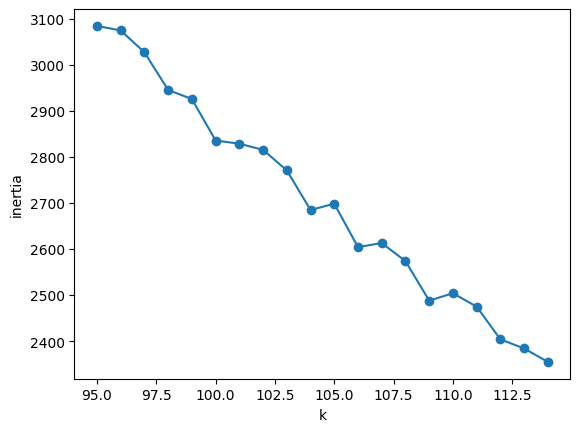

In [20]:
plt.plot(k_arr, inertias, '-o')
plt.ylabel('inertia')
plt.xlabel('k')

Text(0.5, 0, 'k')

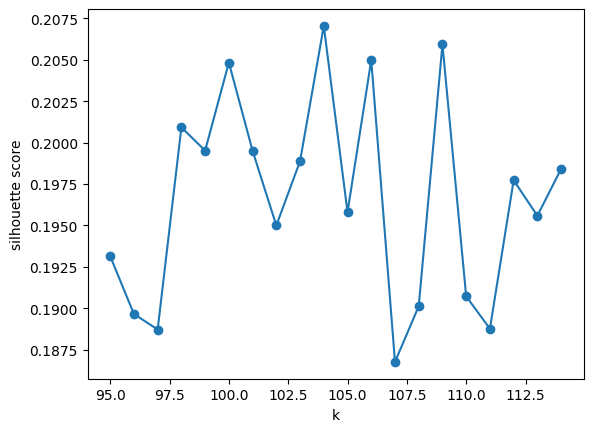

In [21]:
plt.plot(k_arr, silhouette_scores, '-o')
plt.ylabel('silhouette score')
plt.xlabel('k')

In [59]:
kmeans = KMeans(n_clusters=104)
kmeans.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=104)

Cluster 0


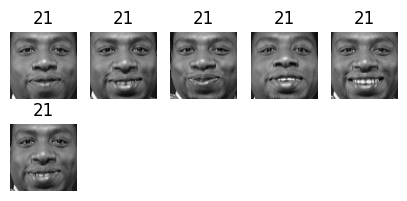

Cluster 1


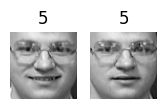

Cluster 2


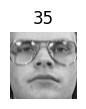

Cluster 3


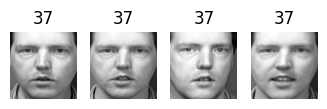

Cluster 4


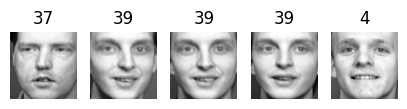

Cluster 5


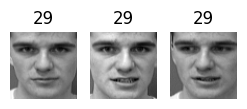

Cluster 6


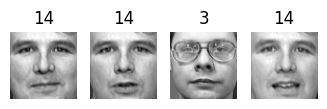

Cluster 7


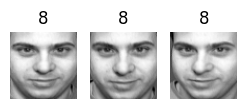

Cluster 8


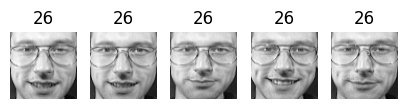

Cluster 9


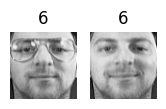

Cluster 10


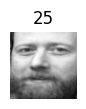

Cluster 11


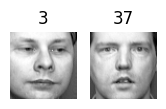

Cluster 12


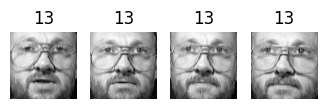

Cluster 13


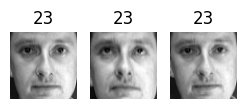

Cluster 14


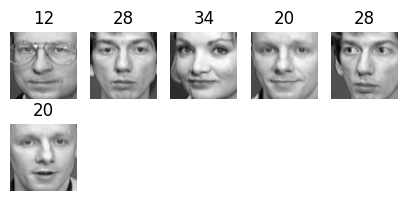

Cluster 15


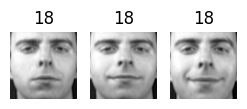

Cluster 16


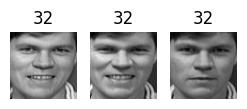

Cluster 17


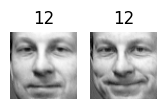

Cluster 18


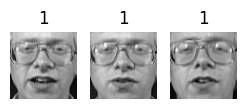

Cluster 19


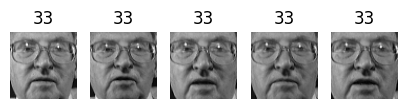

Cluster 20


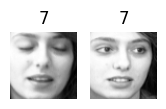

Cluster 21


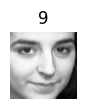

Cluster 22


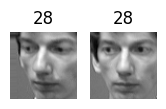

Cluster 23


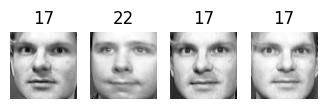

Cluster 24


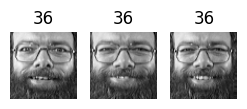

Cluster 25


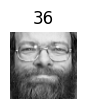

Cluster 26


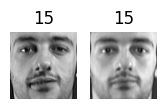

Cluster 27


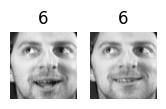

Cluster 28


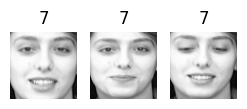

Cluster 29


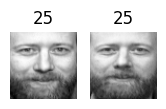

Cluster 30


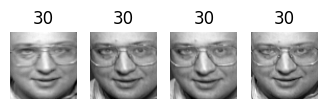

Cluster 31


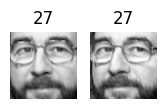

Cluster 32


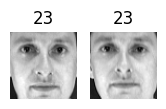

Cluster 33


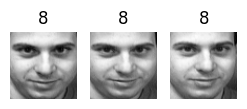

Cluster 34


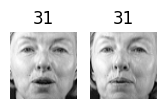

Cluster 35


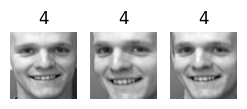

Cluster 36


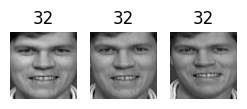

Cluster 37


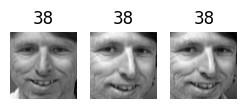

Cluster 38


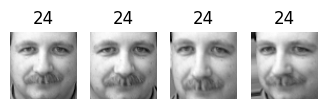

Cluster 39


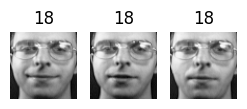

Cluster 40


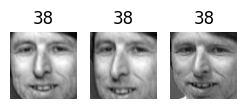

Cluster 41


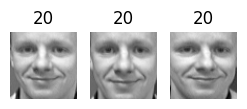

Cluster 42


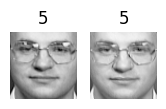

Cluster 43


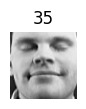

Cluster 44


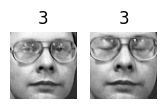

Cluster 45


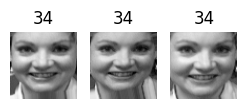

Cluster 46


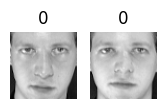

Cluster 47


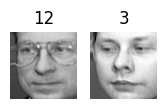

Cluster 48


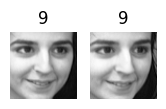

Cluster 49


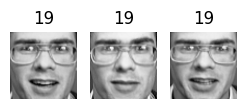

Cluster 50


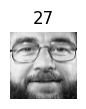

Cluster 51


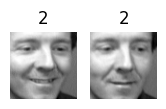

Cluster 52


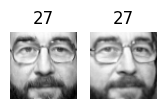

Cluster 53


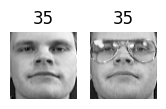

Cluster 54


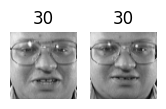

Cluster 55


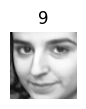

Cluster 56


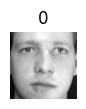

Cluster 57


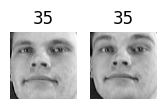

Cluster 58


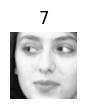

Cluster 59


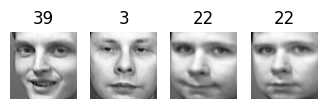

Cluster 60


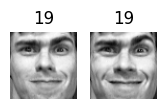

Cluster 61


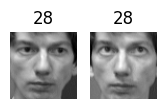

Cluster 62


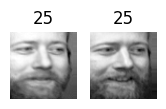

Cluster 63


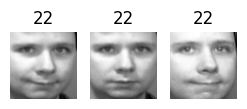

Cluster 64


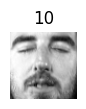

Cluster 65


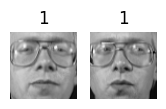

Cluster 66


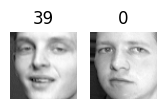

Cluster 67


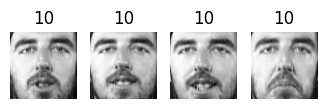

Cluster 68


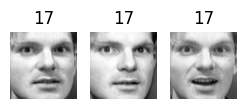

Cluster 69


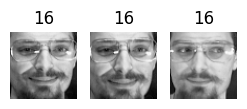

Cluster 70


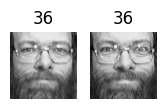

Cluster 71


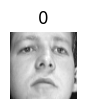

Cluster 72


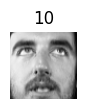

Cluster 73


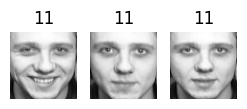

Cluster 74


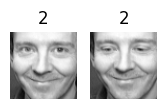

Cluster 75


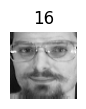

Cluster 76


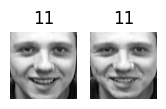

Cluster 77


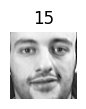

Cluster 78


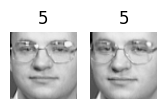

Cluster 79


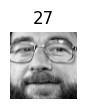

Cluster 80


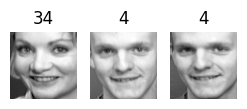

Cluster 81


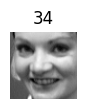

Cluster 82


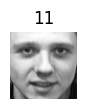

Cluster 83


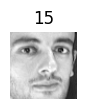

Cluster 84


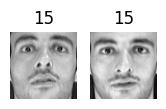

Cluster 85


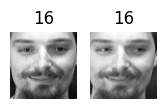

Cluster 86


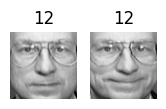

Cluster 87


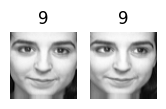

Cluster 88


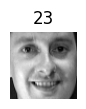

Cluster 89


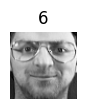

Cluster 90


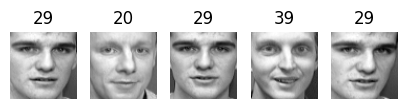

Cluster 91


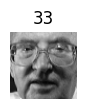

Cluster 92


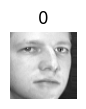

Cluster 93


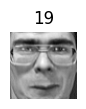

Cluster 94


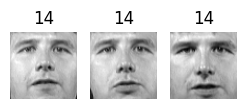

Cluster 95


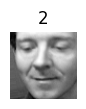

Cluster 96


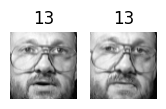

Cluster 97


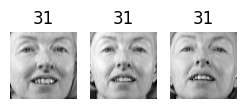

Cluster 98


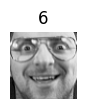

Cluster 99


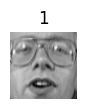

Cluster 100


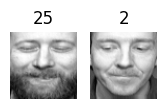

Cluster 101


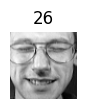

Cluster 102


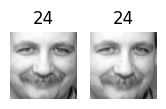

Cluster 103


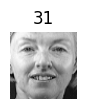

In [32]:
import numpy as np


def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(kmeans.labels_):
    print("Cluster", cluster_id)
    in_cluster = kmeans.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

# 11.

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print(log_reg.score(X_val, y_val))

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=104)),
    ('log_reg', LogisticRegression())
])
pipeline.fit(X_train, y_train)
print(pipeline.score(X_val, y_val))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.95
0.875


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
X_train_transformed = kmeans.transform(X_train)
X_val_transformed = kmeans.transform(X_val)
X_test_transformed = kmeans.transform(X_test)

X_train_expanded = np.c_[X_train, X_train_transformed]
X_val_expanded = np.c_[X_val, X_val_transformed]
X_test_expanded = np.c_[X_test, X_test_transformed]

log_reg.fit(X_train_expanded, y_train)
log_reg.score(X_val_expanded, y_val)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9125

# 12.

In [63]:
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture


pca = PCA(n_components=0.99)
X_reduced = pca.fit_transform(X)

gm = BayesianGaussianMixture(n_components=110)
gm.fit(X_reduced)

BayesianGaussianMixture(n_components=110)

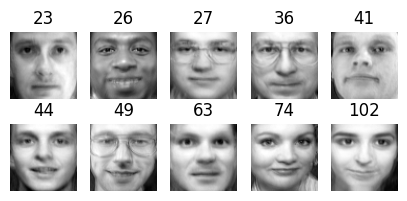

In [65]:
X_sample, y_sample = gm.sample(10)
new_faces = pca.inverse_transform(X_sample)
plot_faces(new_faces, y_sample)

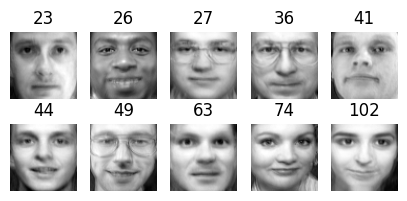

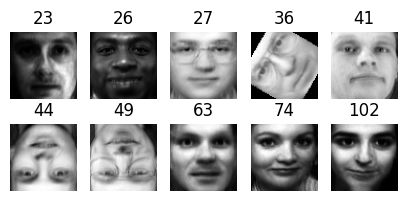

In [155]:
from scipy.ndimage import rotate
from random import randint, randrange, choice, uniform


def modify_images(images):
    modified_images = []
    operations = [
        lambda image: np.flip(image, randint(0, 1)),
        lambda image: rotate(image, randrange(0, 360, 30), reshape=False),
        lambda image: np.clip(image**randrange(3, 5), 0, 1),
    ]
    for image in images:
        image = image.reshape(64, 64)
        operation = choice(operations)
        modified_images.append(operation(image).flatten())

    return np.array(modified_images)

modified_faces = modify_images(new_faces)
plot_faces(new_faces, y_sample)
plot_faces(modified_faces, y_sample)

In [157]:
print(gm.score_samples(X_reduced[:10]))
print(gm.score_samples(pca.transform(modified_faces)))

[589.90692075 589.56351695 589.76610198 587.79538964 589.51785042
 587.54401369 588.20593871 589.18655693 588.12306938 588.77368764]
[ -23734.68435423  -17341.2096129    -4174.16519878 -136126.88979659
  -15428.9676849   -55741.53838764  -70342.19758727  -15651.30864981
  -16154.29253616  -21094.92281686]


# 13.

In [161]:
def calc_reconstruction_error(X, pca):
    X_reduced = pca.transform(X)
    X_recovered = pca.inverse_transform(X_reduced)
    mse = np.square(X_recovered - X).mean()
    return mse

print(calc_reconstruction_error(X, pca))
print(calc_reconstruction_error(modified_faces, pca))

0.00019257101
0.0022355193339493535


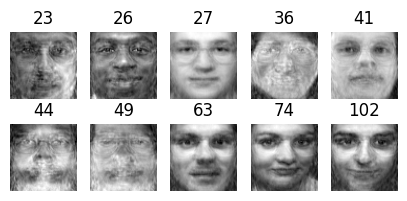

In [162]:
modified_faces_reduced = pca.transform(modified_faces)
modified_faces_recovered = pca.inverse_transform(modified_faces_reduced)
plot_faces(modified_faces_recovered, y_sample)